In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def gauss(x, sigma):
    sigma_sq = sigma * sigma
    return 1.0 / np.sqrt(2.0 * np.pi * sigma_sq) * np.exp(-x*x/(2 * sigma_sq))

In [47]:
def create_gauss_mask(width=16, sigma=0.5): 
    rates = [0.0] * (width * width)
    hw = width // 2
    for i in range(width):
        x = (i - hw) / float(hw)
        for j in range(width):
            y = (j - hw) / float(hw)
            r = np.sqrt(x*x + y*y)
            rates[j*width + i] = gauss(r, sigma=sigma)
    rates = np.array(rates)
    # Normalize
    rates = rates / np.max(rates)
    return rates

In [48]:
mask = create_gauss_mask()

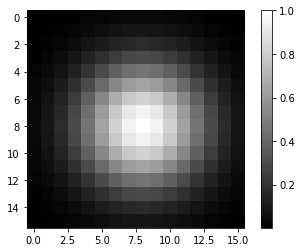

In [49]:
plt.figure()
plt.imshow(rates.reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

In [1]:
from dataset import Dataset
dataset = Dataset()

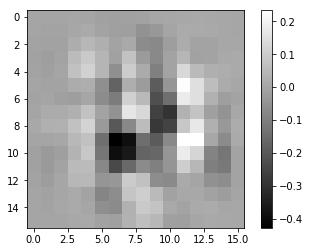

In [5]:
image = dataset.get_image(501, 0)
plt.figure()
plt.imshow(image.reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

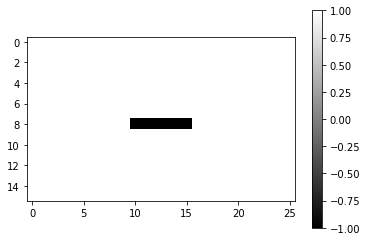

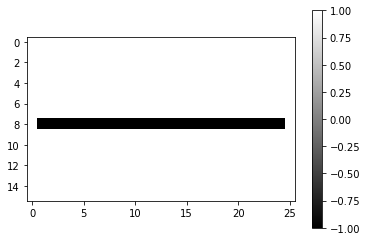

In [36]:
def get_bar_patch(is_short, scale=1.0):
    bar_patch = np.ones((16,26), dtype=np.float32)

    if is_short:
        #bar_width = 10
        bar_width = 7
    else:
        bar_width = 24
    bar_height = 1

    for x in range(bar_patch.shape[1]):
        for y in range(bar_patch.shape[0]):
            if x >= 26//2 - bar_width//2 and \
            x < 26//2 + bar_width//2 and \
            y >= 16//2 - bar_height//2 and \
            y <= 16//2 + bar_height//2:
                bar_patch[y,x] = -1.0
    return bar_patch * scale

bar_patch_short = get_bar_patch(is_short=True)
bar_patch_long  = get_bar_patch(is_short=False)

plt.figure()
plt.imshow(bar_patch_short, cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(bar_patch_long, cmap='gray')
plt.colorbar()
plt.show()